In [1]:
import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

In [2]:
"""Our system of differential equations belongs to the complex space, that is why we implemented the code suggested in"""
"""https://stackoverflow.com/questions/19910189/scipy-odeint-with-complex-initial-values."""

import time
import numpy as np
from scipy.integrate import odeint
from scipy.special import zeta
from random import choices

def odeintz(func, z0, t, **kwargs):
   
    
    """An odeint-like function for complex valued differential equations.

    Inputs:
    ----------
      -func: function associated to dr/dt=f(x;t), where x is the set of parameters and variables to be determined
      -z0: 1d array with length N*(5N-1)/2
      -t: 1d array from t=0 to t=tf (parameter set by the user)
      - **kwargs: keyword arguments related with external functions to be used in odeint
    
    Return:
      -z: multivariable array with the solution of the differential equation associated with each variable"""

    # Disallow Jacobian-related arguments.
    _unsupported_odeint_args = ['Dfun', 'col_deriv', 'ml', 'mu']
    bad_args = [arg for arg in kwargs if arg in _unsupported_odeint_args]
    if len(bad_args) > 0:
        raise ValueError("The odeint argument %r is not supported by "
                         "odeintz." % (bad_args[0],))

    # Make sure z0 is a numpy array of type np.complex128.
    z0 = np.array(z0, dtype=np.complex128, ndmin=1)

    def realfunc(x, t, *args):
        z = x.view(np.complex128)
        dzdt = func(z, t, *args)
        # func might return a python list, so convert its return
        # value to an array with type np.complex128, and then return
        # a np.float64 view of that array.
        return np.asarray(dzdt, dtype=np.complex128).view(np.float64)

    result = odeint(realfunc, z0.view(np.float64), t, **kwargs)

    if kwargs.get('full_output', False):
        z = result[0].view(np.complex128)
        infodict = result[1]
        return z, infodict
    else:
        z = result.view(np.complex128)
        return z

In [3]:
def Jij(J,j,w,epsilon,N,Vect):
    
    norm=np.linalg.norm(np.array(Vect[j])-np.array(Vect[w]))
    
    return (J/N)*(1/norm**epsilon)*(1/dist_ar**epsilon)
    
    

In [23]:
#length_side=2
#N=length_side**3

N=40
J=1
epsilon=0

refgamma=0.2  #Fixed
refomega=1



Gamma_phi=refgamma*J
Omega=refomega*J
dist_ar=1


#for -z

def init_vect(N=N):
    rx=[]
    ry=[]
    rz=[]
    for j in range(N):
        
        a=(choices([-1,1]))[0]
        b=(choices([-1,1]))[0]
        
        rx.append(1)
        ry.append(a)
        rz.append(b)


    return rx+ry+rz



def Vectors(length_side):
    vect=[]
    for j in range(length_side**3):
        b=j//length_side**2
        c=(j-b*length_side**2)//length_side
        d=j-b*length_side**2-c*length_side
        vect.append([b,c,d])
    return vect


#Vect=Vectors(length_side)


def Jij(J,j,w,epsilon,N,Vect):
    
    norm=np.linalg.norm(np.array(Vect[j])-np.array(Vect[w]))
    
    return (J/N)*(1/norm**epsilon)*(1/dist_ar**epsilon)

Vect=[]

def vectorsR(r, t,N=N,J=J,epsilon=epsilon,Gamma_phi=Gamma_phi,Omega=Omega,Vect=Vect):   
    
    #matrix_zero=np.zeros((int(3*N),int(3*N)),dtype = 'complex_')
    matrix_zero=np.zeros((int(3*N),int(3*N)))
    
    
    drdt =  np.matmul(matrix_zero, r)  #matrix_zero @ r   #sum of the linear and the constant part
    #drdt = matrix_zero @ r
    
    
    ###Define Vect which is an array of coordinates of size N
    
    
    for j in range(N):
        
        
        drdt[j]=drdt[j]-Gamma_phi*r[j]   #s_i^x
        drdt[j+N]=drdt[j+N]-Omega*r[j+2*N]-Gamma_phi*r[j+N]    #s_i^y
        drdt[j+2*N]=drdt[j+2*N]+Omega*r[j+N]    #s_i^z
    
    
       
        for w in range(N):
            
            if w!=j:
                #norm=np.linalg.norm(np.array(Vect[j])-np.array(Vect[w]))
                
                
                #drdt[j]=drdt[j]-2* r[j+N]*r[w+2*N]*(J/N)*(1/norm**epsilon)*(1/dist_ar**epsilon)  #s_i^x
                #drdt[j+N]=drdt[j+N]+2* r[j]*r[w+2*N]*(J/N)*(1/norm**epsilon)*(1/dist_ar**epsilon)  #s_i^y  
                
                drdt[j]=drdt[j]-2* r[j+N]*r[w+2*N]*(J/N)  #s_i^x  all to all
                drdt[j+N]=drdt[j+N]+2* r[j]*r[w+2*N]*(J/N)  #s_i^y             
        
               
    return drdt





40 0.6031696796417236


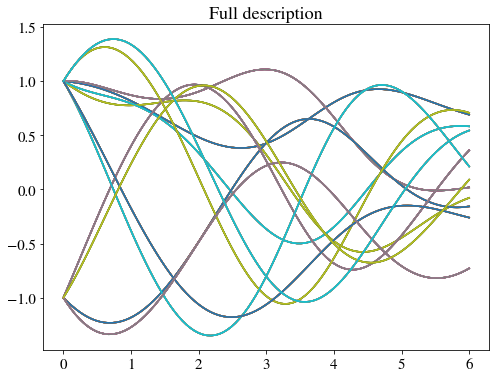

In [24]:
r0=init_vect(N)

init_time=0
final_time=6
steps=100


t = np.linspace(init_time, final_time, steps)

import time

t0=time.time()

#z=odeintz(vectorsR, r0, t)#, args=(N,L))

z=odeint(vectorsR, r0, t)#, args=(N,L))


t1=time.time()

print(N,t1-t0)

plt.title("Full description")

for j in range(3*N):
    plt.plot(t,np.real(z[:,j]),label="Re"+str(j))
    #plt.plot(t,np.imag(z[:,j]),'-.',label="Im"+str(j))

In [25]:
def S_array(z):
    Sx=z[:,0]
    Sy=z[:,N]
    Sz=z[:,2*N]
    
    FullSx=[Sx/2]
    FullSy=[Sy/2]
    FullSz=[Sz/2]
    
    
    
    for j in range(1,N):
        Sx=np.add(Sx,z[:,j])
        Sy=np.add(Sy,z[:,N+j])
        Sz=np.add(Sz,z[:,2*N+j])
        
        FullSx.append(z[:,j]/2)
        FullSy.append(z[:,N+j]/2)
        FullSz.append(z[:,2*N+j]/2)
        
        
        
    
    Sx=Sx/2
    Sy=Sy/2
    Sz=Sz/2
    
    
    return Sx, Sy, Sz, FullSx, FullSy, FullSz

In [26]:
z0=init_vect(N)
z = odeint(vectorsR, z0, t)

In [27]:
def history(n):
    
    count=1

    z0=init_vect(N)
    z = odeint(vectorsR, z0, t)
    
    Sx=S_array(z)[0]
    Sy=S_array(z)[1]
    Sz=S_array(z)[2]
    
    FullSx=[list(Sx)]
    FullSy=[list(Sy)]
    FullSz=[list(Sz)]
    
    
    
    Sxx= (Sx)**2
    Syy=(Sy)**2
    Szz=(Sz)**2
    

    for j in range(2,n+1):
        
        count=count+1
        
        z0=init_vect(N)
        z = odeint(vectorsR, z0, t)
        
        Sx = Sx+S_array(z)[0]
        Sy = Sy+S_array(z)[1]
        Sz = Sz+S_array(z)[2]
        
        FullSx.append(list(S_array(z)[0]))
        FullSy.append(list(S_array(z)[1]))
        FullSz.append(list(S_array(z)[2]))
        
        
        Sxx = Sxx+(S_array(z)[0])**2
        Syy = Syy+(S_array(z)[1])**2
        Szz = Szz+(S_array(z)[2])**2
        
        
    return Sx/(count),Sy/(count),Sz/(count),Sxx/(count),Syy/(count),Szz/(count),FullSx,FullSy,FullSz

In [ ]:
t=np.linspace(0,20,100)

t0=time.time()
a=history(100)
t1=time.time()

print(t1-t0)



In [ ]:
smz = np.matrix(a[-1])

smy=np.matrix(a[-2])

smx=np.matrix(a[-3])

In [ ]:
import pandas as pd

Resultsz=pd.DataFrame(smz)
Resultsy=pd.DataFrame(smy)
Resultsx=pd.DataFrame(smx)

In [ ]:
def trace(A):
    
    """Returns the trace of a square matrix
    
    Inputs:
    ----------
      -array: array associated to the matrix that we want to determine the trace
    
    Return:
      -complex: return a complex number which is the trace of the matrix of the input""" 
    
    
    return np.trace(A)  #Returns the trace of a square matrix


def matmu(A,B):
    """Perform the matrix multiplication of the matrices A and B of the form A.B
    
    Inputs:
    ----------
      -arrays: two array associated to the matrices A and B respectively
    
    Return:
      -array: array with the result of A.B or raises an error otherwise""" 
    
    return np.matmul(A,B) #Returns the result of the multiplication of matrix A and B in the order A.B

In [ ]:
rho_init0=np.array([[1/2,1/2],[1/2,1/2]])

sigma_p= np.array([[0,1],[0,0]])  #Matrix sigma+
sigma_m= np.array([[0,0],[1,0]])  #Matrix sigma-
sigma_z= np.array([[1,0],[0,-1]]) #Matrix sigmaz


##Initial values per operator

sp_init0=trace(matmu(rho_init0,sigma_p))  #initial value for sigma+
sz_init0=trace(matmu(rho_init0,sigma_z))  #initial value for sigma-
sm_init0=trace(matmu(rho_init0,sigma_m))  #initial value for sigmaz

In [ ]:

def zfunc(g, t,a=1):
    p, z, pp, pm, zp, zz= g
    
    dpdt =-1j*(Omega/2)*z+2j*J*((N-1)/N)*zp-Gamma_phi*p
    dzdt =2*Omega*np.imag(p)
    dppdt=-1j*Omega*zp+4j*J*((N-2)/N)*(pp*z+2*zp*p-2*(p**2)*z)-2*Gamma_phi*pp
    dpmdt=-Omega*np.imag(zp)-2*Gamma_phi*pm
    #dzpdt=-1j*Omega*(pp-np.conjugate(pm)-zp)+2j*(J/N)*(p+(N-2)*(2*zp*z+zz*p-2*p*z**2)  )-Gamma_phi*zp
    dzpdt=-1j*(Omega/2)*(2*(pp-pm)+zz)+2j*(J/N)*(p+(N-2)*(2*zp*z+zz*p-2*p*z**2)  )-Gamma_phi*zp
    dzzdt=4*Omega*np.imag(zp)
    
    
    
    return [dpdt,dzdt,dppdt,dpmdt,dzpdt,dzzdt] 


sp_init0
sz_init0
sm_init0

z0=[sp_init0,sz_init0,sp_init0**2,sp_init0*sm_init0,sz_init0*sp_init0,sz_init0**2]

z = odeintz(zfunc, z0, t)


In [ ]:
plt.plot(t,Resultsx.mean(),label="DTWA")

plt.plot(t,(N/2)*(z[:,0]+np.conjugate(z[:,0])),label="Cumulant")

#plt.plot(t, (N/2)*np.exp(-Gamma_phi*t)*(np.cos(2*J*t/N))**(N-1),label="Analytic")